# Installing dependencies and models

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 # download suitable pytourch veriosn for the system

Looking in indexes: https://download.pytorch.org/whl/cu118
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 GB 7.0 MB/s eta 0:06:55
   ---------------------------------------- 0.0/2.9 GB 9.7 MB/s eta 0:05:00
   ---------------------------------------- 0.0/2.9 GB 10.8 MB/s eta 0:04:30
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:25
   ---------------------------------------- 0.0/2.9 GB 11.3 MB/s eta 0:04:17
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:23
   ---------------------------------------- 0.0/2.9 GB 11.1 MB/s eta 0:04:22
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:24
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:23
   ---------------------------------------- 0.0/2.9 GB 11.0 MB/s eta 0:04:24
   ---------------------------------------- 0.0/2.9 GB 10.9 MB/s eta 0:04:25
   ------------------------

In [3]:
!git clone https://github.com/ultralytics/yolov5 # Clone the yolov5 repo, if doesn't work, run it in terminal, need to install Git first if haven't done so

'git' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
!cd yolov5_drowsiness

In [13]:
pip install -r requirements.txt # install the requirments txts

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#install': Expected package name at the start of dependency specifier
    #install
    ^


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning) # Silents the warnings in live feed 

# Load the model

In [3]:
# yolov5s is used, larger model are also avaliable refer to https://github.com/ultralytics/yolov5 
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-5 Python-3.12.7 torch-2.7.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Test the model with image

In [19]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [20]:
results = model(img)
results.print()

C:\Users\Esco/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 2896.7ms pre-process, 69.1ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


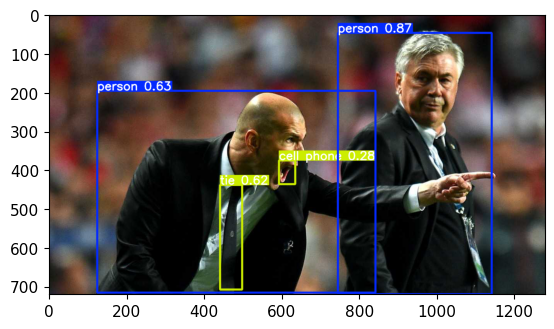

In [21]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [22]:
results.render()

[array([[[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [54, 18, 20],
         [52, 16, 18],
         [51, 15, 17]],
 
        [[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [54, 18, 20],
         [52, 16, 18],
         [52, 16, 18]],
 
        [[76, 51, 44],
         [75, 50, 43],
         [73, 48, 41],
         ...,
         [55, 19, 21],
         [53, 17, 19],
         [52, 16, 18]],
 
        ...,
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [38, 50, 50],
         [39, 51, 51],
         [40, 52, 52]],
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [38, 50, 50],
         [39, 51, 51],
         [40, 52, 52]],
 
        [[40, 44, 53],
         [39, 43, 52],
         [38, 42, 51],
         ...,
         [37, 49, 49],
         [39, 51, 51],
         [40, 52, 52]]], dtype=uint8)]

### Test the live feed using camera

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Trainning

In [4]:
import os
print(os.getcwd())

C:\Users\Esco\OneDrive


In [12]:
os.chdir('C:/Users/yeou1/OneDrive/yolov5_drowsiness/yolov5') # make sure we are in yolov5 folder and change path to local directory

--img image resolution 320,420,640 <br>
--batch ram usage <br>
--epochs amount of runs <br>
--data .yaml file <br>
--weights model size, the large the model the better accuracy in return its the slowest <br>
--name the name of the folder where the resultes will save <br>

In [15]:
# !python train.py --img 320 --batch 16 --epochs 500 --data data.yaml --weights yolov5s.pt --name drowsiness_detector_runs

WARNING Error decoding JSON from C:\Users\Esco\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Esco\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)


  with torch.cuda.amp.autocast(amp):

    240/499         0G    0.01712   0.007916   0.004406         36        320:  97%|#########6| 205/212 [04:39<00:09,  1.35s/it]
    240/499         0G    0.01712   0.007916   0.004406         36        320:  97%|#########7| 206/212 [04:39<00:08,  1.36s/it]C:\Users\Esco\OneDrive\yolov5_drowsiness\yolov5\train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):

    240/499         0G    0.01712   0.007916   0.004415         34        320:  97%|#########7| 206/212 [04:40<00:08,  1.36s/it]
    240/499         0G    0.017

# Load the model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Esco/OneDrive/yolov5_drowsiness/yolov5/runs/train/drowsiness_detector_runs5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Esco/.cache\torch\hub\master.zip


YOLOv5  2025-6-25 Python-3.12.7 torch-2.7.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from openpyxl import load_workbook
from openpyxl.drawing.image import Image as XLImage

# Live feed detection

In [12]:
# Constants
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
DROWSY_THRESHOLD_FRAMES = 30  # Number of consecutive frames to confirm drowsy

# Change the path to local directory
save_dir = "C:/Users/Esco/OneDrive/yolov5_drowsiness/yolov5/Reports/"
log_filename= f"{save_dir}fatigue_dashboard_with_time_{timestamp}.xlsx"
fatigue_plot_path = f"{save_dir}fatigue_event_counts_{timestamp}.png"
fatigue_time_plot_path = f"{save_dir}fatigue_events_over_time_{timestamp}.png"

# Initialize variables
cap = cv2.VideoCapture(0)
drowsy_frame_count = 0
drowsiness_log = []

print("Starting monitoring. Press 'q' to quit.")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)  # Run inference on frame
    detections = results.pandas().xyxy[0]
    labels = detections['name'].values

    # Detect drowsy
    is_drowsy = 'drowsy' in labels

    # Track drowsiness duration
    if is_drowsy:
        drowsy_frame_count += 1
    else:
        # If drowsy persisted enough frames, log the event
        if drowsy_frame_count >= DROWSY_THRESHOLD_FRAMES:
            drowsiness_log.append((datetime.now(), "Person", "Drowsiness Alert"))
        drowsy_frame_count = 0

    # Optionally filter out short drowsy detections so they don't show on display
    if drowsy_frame_count < DROWSY_THRESHOLD_FRAMES:
        detections = detections[detections['name'] != 'drowsy']
        results.pandas().xyxy[0] = detections

    # Show frame with bounding boxes
    frame_with_boxes = np.squeeze(results.render())
    cv2.imshow("YOLO Drowsiness Monitor", frame_with_boxes)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

# Create DataFrame from logs
df = pd.DataFrame(drowsiness_log, columns=["timestamp", "person", "event"])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- Plot 1: Event Counts ---
plt.figure(figsize=(6, 4))
event_counts = df['event'].value_counts()
sns.barplot(x=event_counts.index, y=event_counts.values, palette=["#FFC107"])
plt.title("Fatigue Event Counts")
plt.ylabel("Count")
plt.xlabel("Event Type")
plt.tight_layout()
plt.savefig(fatigue_plot_path)
plt.close()

# --- Plot 2: Events Over Time ---
bin_size = '10S'  # 10 sec, for minutes use T
df['time_bin'] = df['timestamp'].dt.floor(bin_size)
time_counts = df.groupby(['time_bin', 'event']).size().unstack(fill_value=0).astype(int)

plt.figure(figsize=(12, 6))
time_counts.plot(kind='bar', stacked=False, color=["#FFC107"])
plt.title("Fatigue Events Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.legend(title='Event')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(fatigue_time_plot_path)
plt.close()

# --- Save to Excel ---
df.to_excel(log_filename, sheet_name='Data', index=False)

wb = load_workbook(log_filename)
ws = wb.create_sheet("Dashboard")

# Insert plots
img1 = XLImage(fatigue_plot_path)
img1.anchor = 'B2'
ws.add_image(img1)

img2 = XLImage(fatigue_time_plot_path)
img2.anchor = 'B25'
ws.add_image(img2)

wb.save(log_filename)

print(f"Monitoring complete. Report saved to: {log_filename}")

Starting monitoring. Press 'q' to quit.
Monitoring complete. Report saved to: C:/Users/Esco/OneDrive/yolov5_drowsiness/yolov5/Reports/fatigue_dashboard_with_time_20250625_133130.xlsx
